In [1]:
import torch
import numpy as np
import time
import matplotlib.pyplot as plt

### 1.5.2 動態圖

### 自訂推定類型

In [2]:
a = torch.tensor([2.])
b = torch.tensor([4.])

print('a+b =', a+b)

a+b = tensor([6.])


### 1.5.3 加速運算

In [3]:
print('Numpy')
numpy_cost = np.zeros(9)

for i in range(9):
    n = 10**i
    start = time.time()
    for j in range(10):
        numpy_a = np.random.normal(size=[1, n])
        numpy_b = np.random.normal(size=[n, 1])
        c = np.matmul(numpy_a, numpy_b)
    numpy_cost[i] = round((time.time() - start)/10, 2)
    print('n={0}, cost={1}sec'.format(n, numpy_cost[i]))

print(numpy_cost)

Numpy
n=1, cost=0.0sec
n=10, cost=0.0sec
n=100, cost=0.0sec
n=1000, cost=0.0sec
n=10000, cost=0.0sec
n=100000, cost=0.01sec
n=1000000, cost=0.06sec
n=10000000, cost=0.48sec
n=100000000, cost=4.62sec
[0.   0.   0.   0.   0.   0.01 0.06 0.48 4.62]


In [4]:
print('CPU')
cpu_cost = np.zeros(9)

for i in range(9):
    n = 10**i
    start = time.time()
    for j in range(10):
        cpu_a = torch.randn(size=[1, n])
        cpu_b = torch.randn(size=[n, 1])
        c = torch.matmul(cpu_a, cpu_b)
    cpu_cost[i] = round((time.time() - start)/10, 2)
    print('n={0}, cost={1}sec'.format(n, cpu_cost[i]))

print(cpu_cost)

CPU
n=1, cost=0.0sec
n=10, cost=0.0sec
n=100, cost=0.0sec
n=1000, cost=0.0sec
n=10000, cost=0.0sec
n=100000, cost=0.0sec
n=1000000, cost=0.02sec
n=10000000, cost=0.19sec
n=100000000, cost=1.68sec
[0.   0.   0.   0.   0.   0.   0.02 0.19 1.68]


In [5]:
print('GPU')
gpu_cost = np.zeros(9)

for i in range(9):
    n = 10**i
    start = time.time()
    for j in range(10):
        gpu_a = torch.randn(size=[1, n]).cuda()
        gpu_b = torch.randn(size=[n, 1]).cuda()
        c = torch.matmul(gpu_a, gpu_b)
    gpu_cost[i] = round((time.time() - start)/10, 2)
    print('n={0}, cost={1}sec'.format(n, cpu_cost[i]))
    
print(gpu_cost)

GPU
n=1, cost=0.0sec
n=10, cost=0.0sec
n=100, cost=0.0sec
n=1000, cost=0.0sec
n=10000, cost=0.0sec
n=100000, cost=0.0sec
n=1000000, cost=0.02sec
n=10000000, cost=0.19sec
n=100000000, cost=1.68sec
[0.13 0.   0.   0.   0.   0.   0.01 0.13 1.3 ]


Text(0, 0.5, 'Avg cost(sec)')

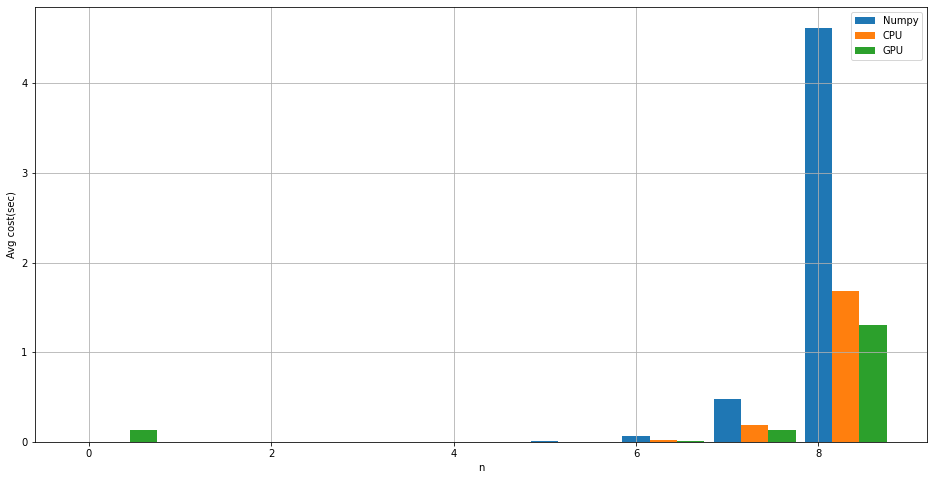

In [6]:
xlabel = np.arange(9)
plt.figure(0, figsize=(16, 8))
plt.bar(xlabel, numpy_cost, width=0.3, label='Numpy')
plt.bar(xlabel+0.3, cpu_cost, width=0.3, label='CPU')
plt.bar(xlabel+0.6, gpu_cost, width=0.3, label='GPU')
plt.legend()
plt.grid()
plt.xlabel('n')
plt.ylabel('Avg cost(sec)')

### 1.5.3 自動梯度

$$
y=w^2+2w+3
\\
\frac{\partial y}{\partial w}=2w+2\left| w=4 \right. 
$$


In [7]:
w = torch.tensor([4.0], requires_grad=True)
a = 1.0
b = 2.0
c = 3.0
y = a*w**2 + b*w + c

y.backward()
dy_dw = w.grad
print(dy_dw)

tensor([10.])
